In [1]:
#Importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
#Importing dataset
df= pd.read_csv('Downloads/spambase_csv.csv')

In [3]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [5]:
#checking for null values
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [5]:
#no missing/ null values found

In [6]:
df.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [7]:
df.describe

<bound method NDFrame.describe of       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32     

In [8]:
print(df.columns)

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [9]:
# Separate the features (X) and the target variable (y)
X = df.drop(columns='class')  # Drop the 'class' column, which is the target variable
y = df['class']  # Select the 'class' column as the target variable

In [10]:
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [11]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [12]:
y.value_counts()

class
0    2788
1    1813
Name: count, dtype: int64

In [13]:
#class is imbalanced 

In [14]:
#importing necessary libraries to handle class imbalance 
from imblearn.over_sampling import SMOTE
from collections import Counter

In [15]:
print(f'Original class distribution: {Counter(y)}')

Original class distribution: Counter({0: 2788, 1: 1813})


In [16]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print(f'Resampled class distribution: {Counter(y_resampled)}')

Resampled class distribution: Counter({1: 2788, 0: 2788})


In [17]:
from sklearn.model_selection import train_test_split

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [18]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3903, 57)
X_test shape: (1673, 57)
y_train shape: (3903,)
y_test shape: (1673,)


In [19]:
#logistic regression for classification

In [20]:
#importing libraries for logistic regression classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
# Initialize the model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

C:\Users\rupsa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [22]:
# Print the accuracy on the training data
print("Training accuracy:", model.score(X_train, y_train))


Training accuracy: 0.9259543940558544


In [23]:
# Make predictions on the test set
y_pred = model.predict(X_test)
print(y_pred[:10])

[0 0 1 0 0 1 0 0 1 1]


In [24]:
# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       818
           1       0.92      0.92      0.92       855

    accuracy                           0.92      1673
   macro avg       0.92      0.92      0.92      1673
weighted avg       0.92      0.92      0.92      1673

Confusion Matrix:
 [[747  71]
 [ 71 784]]


In [25]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'newton-cg'],
    'max_iter': [100, 200, 300]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best hyperparameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test)

# Print classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))


Best hyperparameters: {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       818
           1       0.94      0.91      0.93       855

    accuracy                           0.93      1673
   macro avg       0.93      0.93      0.93      1673
weighted avg       0.93      0.93      0.93      1673

Confusion Matrix:
[[770  48]
 [ 76 779]]


In [26]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print the mean cross-validation score
print(f"Cross-validation accuracy: {cv_scores.mean()}")

C:\Users\rupsa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rupsa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross-validation accuracy: 0.8998005476089317


C:\Users\rupsa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rupsa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [27]:
# Print the column names of the dataframe
print(df.columns)

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [28]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(eval_metric='mlogloss'),
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.8}
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       818
           1       0.96      0.95      0.95       855

    accuracy                           0.95      1673
   macro avg       0.95      0.95      0.95      1673
weighted avg       0.95      0.95      0.95      1673

Confusion Matrix:
 [[782  36]
 [ 45 810]]


In [30]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred_test = grid_search.best_estimator_.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test set accuracy: {accuracy}")

Test set accuracy: 0.9515839808726838


In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision, recall, and F1-score on the test set
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')


Precision: 0.9169590643274854
Recall: 0.9169590643274854
F1-score: 0.9169590643274854


In [32]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')


Confusion Matrix:
[[747  71]
 [ 71 784]]


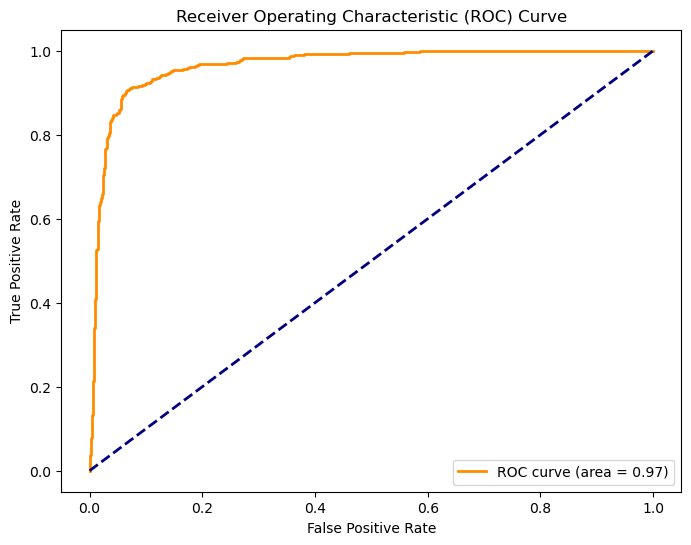

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [34]:
from sklearn.metrics import roc_auc_score

# Get the predicted probabilities for the positive class (spam in this case)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_prob)

print("AUC: ", auc)


AUC:  0.9656686541128698


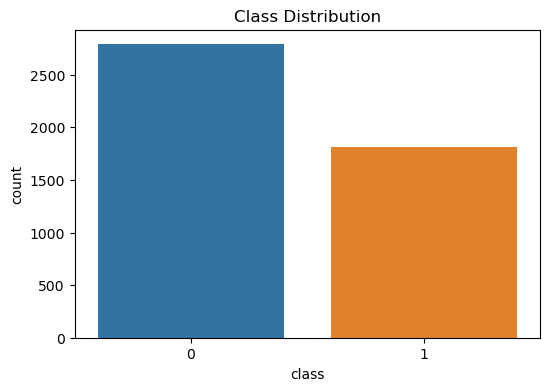

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()


In [37]:
#here 0 is non-spam mails and 1 is for spam mails. 

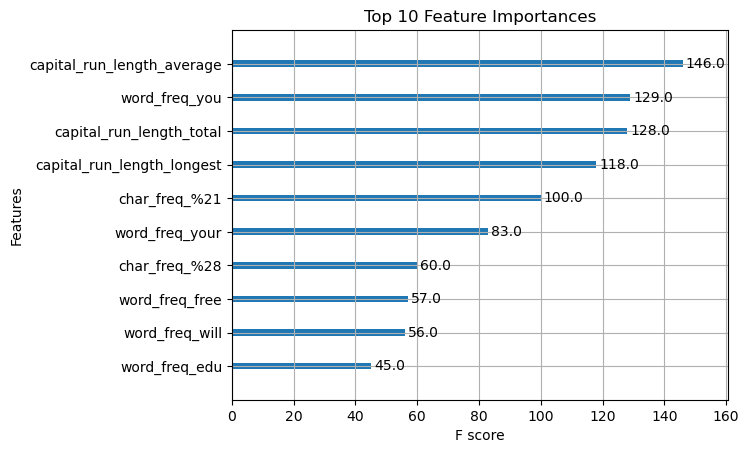

In [38]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Ensure that the model is an XGBoost model
model = xgb.XGBClassifier()  # Example of initializing an XGBoost model

# Fit the model (make sure you have trained it on the dataset)
model.fit(X_train, y_train)

# Plot the feature importance
xgb.plot_importance(model, importance_type='weight', max_num_features=10)
plt.title('Top 10 Feature Importances')
plt.show()


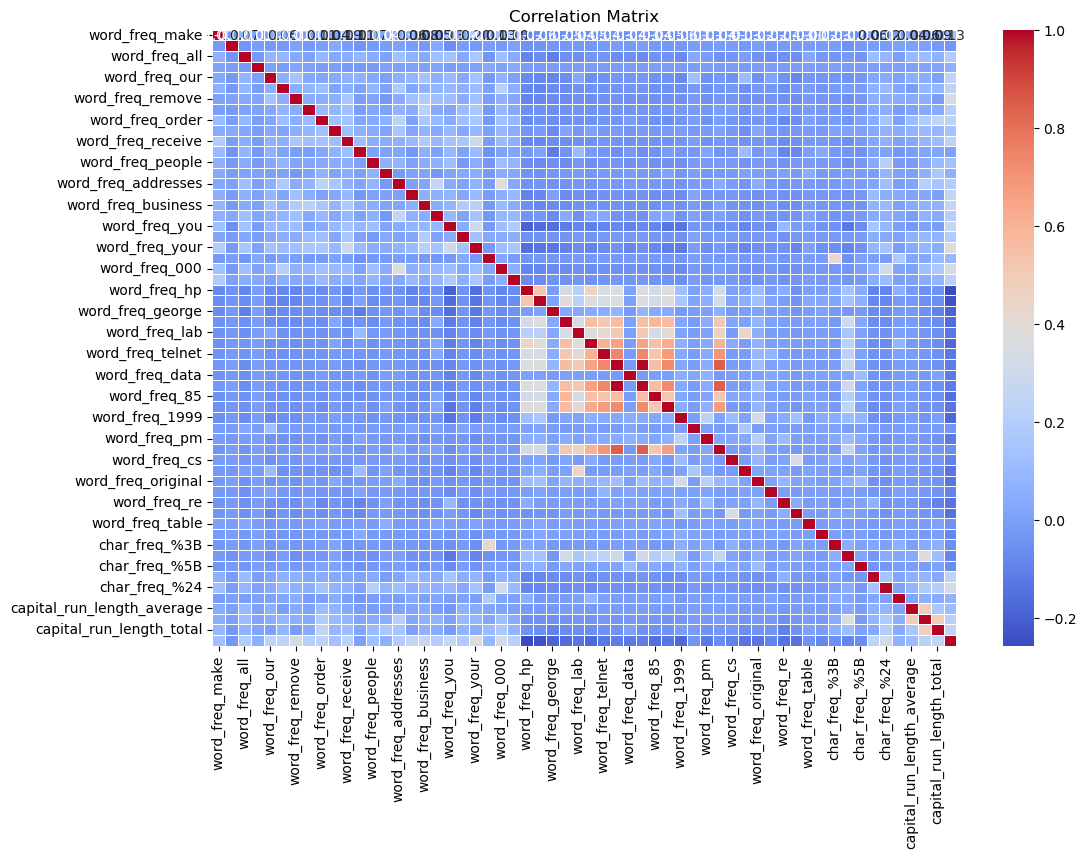

In [39]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

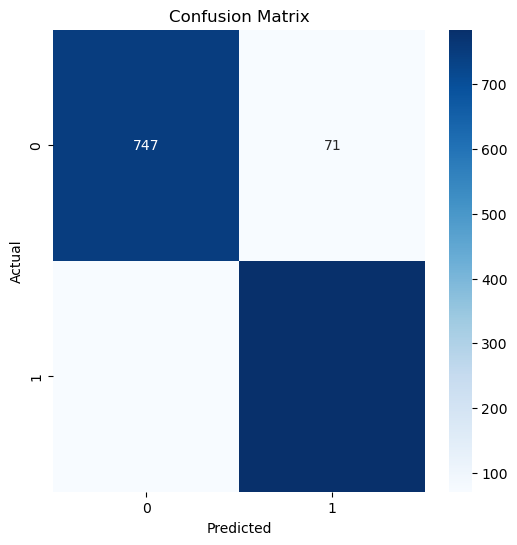

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

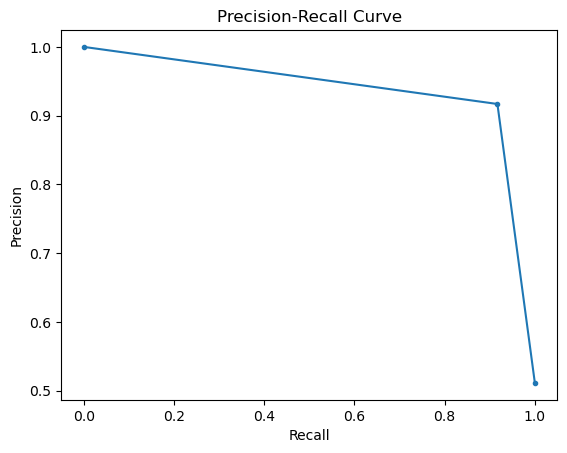

In [41]:
from sklearn.metrics import precision_recall_curve

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


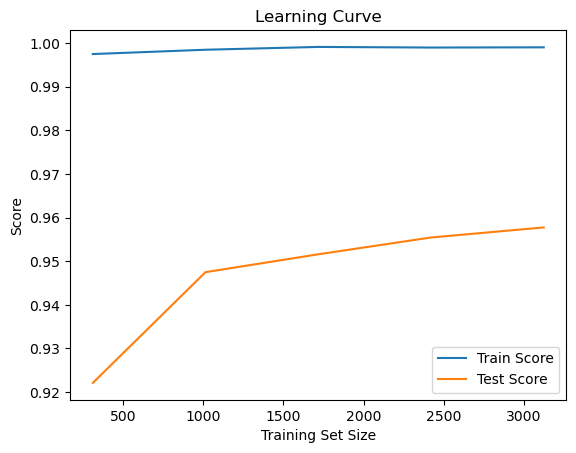

In [42]:
from sklearn.model_selection import learning_curve

# Learning curve for training and testing
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test Score')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()
plt.show()

In [43]:
#random forest for classification 

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Assuming df is your dataset and 'class' is the target column

# Features (X) and target (y)
X = df.drop(columns=['class'])
y = df['class']

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (3680, 57)
X_test shape: (921, 57)
y_train shape: (3680,)
y_test shape: (921,)


In [47]:
# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
# Check the accuracy on the test set
accuracy = rf_model.score(X_test, y_test)
print(f"Test set accuracy: {accuracy}")

Test set accuracy: 0.9554831704668838


In [49]:
# Generate classification report
y_pred = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       531
           1       0.98      0.92      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.95      0.95       921
weighted avg       0.96      0.96      0.96       921



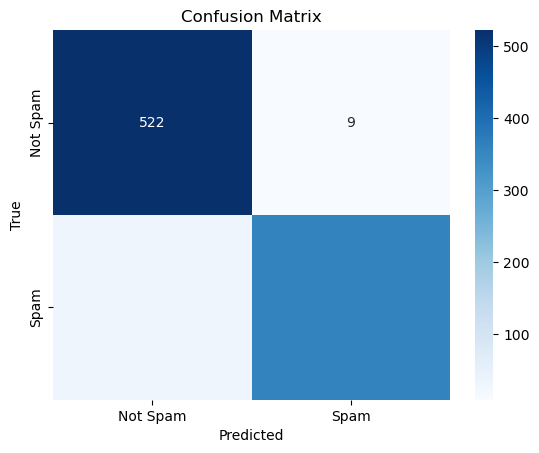

In [50]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

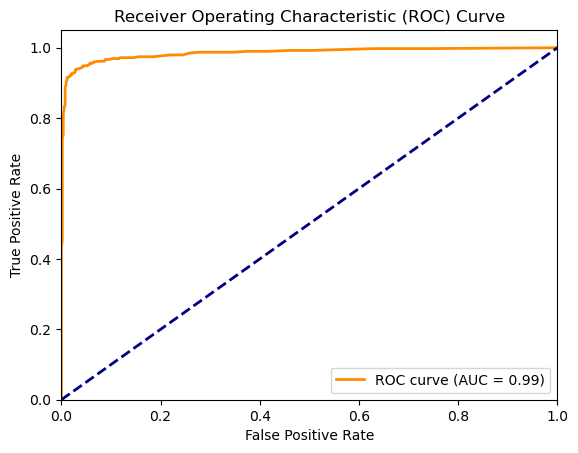

In [51]:
# Calculate probabilities for ROC curve
y_prob = rf_model.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

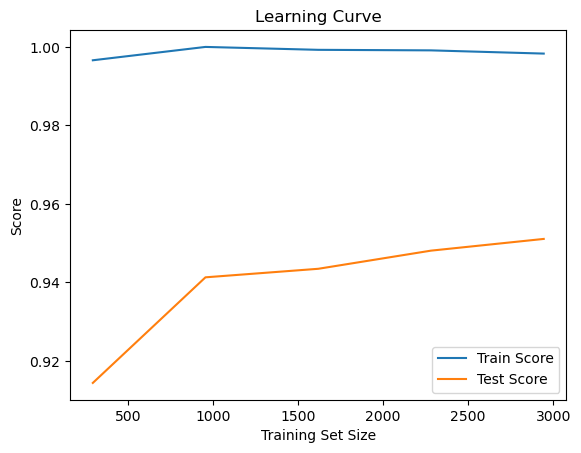

In [52]:
from sklearn.model_selection import learning_curve

# Learning curve for training and testing
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test Score')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()
plt.show()

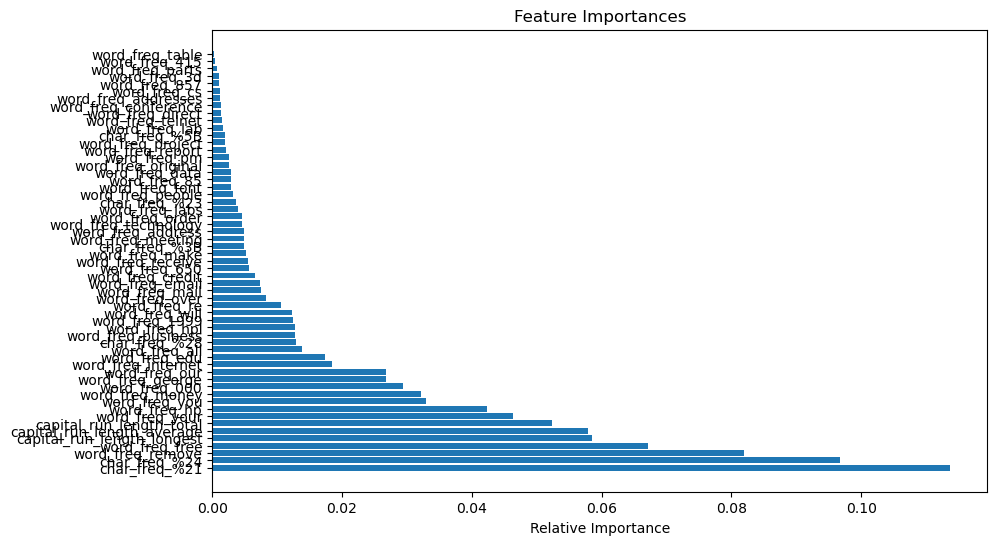

In [53]:
# Plot feature importance
importances = rf_model.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [54]:
#hyperparameter tuning
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Use best estimator from GridSearchCV
best_rf_model = grid_search.best_estimator_

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


Final Test Accuracy: 0.9576547231270358
Final Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       531
           1       0.98      0.92      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.95      0.96       921
weighted avg       0.96      0.96      0.96       921



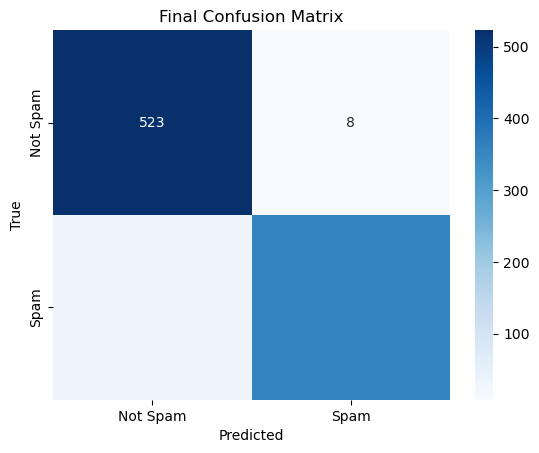

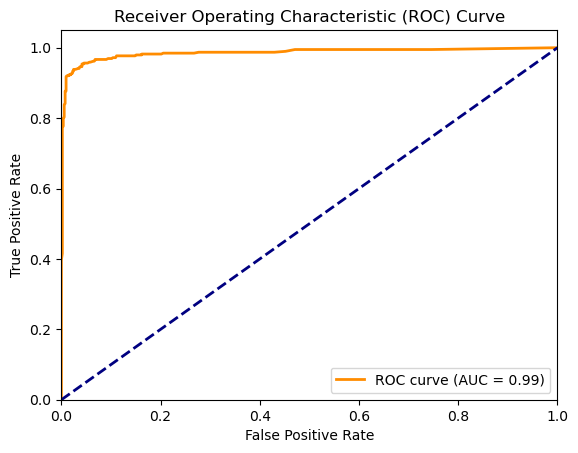

In [55]:
#evaluating the final model 
# Predictions from best model
y_pred_final = best_rf_model.predict(X_test)

# Final accuracy
accuracy_final = best_rf_model.score(X_test, y_test)
print(f"Final Test Accuracy: {accuracy_final}")

# Final classification report
print("Final Classification Report:\n", classification_report(y_test, y_pred_final))

# Final confusion matrix
final_conf_matrix = confusion_matrix(y_test, y_pred_final)
sns.heatmap(final_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Final Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Final ROC and AUC
y_prob_final = best_rf_model.predict_proba(X_test)[:, 1]
fpr_final, tpr_final, thresholds_final = roc_curve(y_test, y_prob_final)
roc_auc_final = auc(fpr_final, tpr_final)

plt.figure()
plt.plot(fpr_final, tpr_final, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_final:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Baseline Model (Default Random Forest)
baseline_rf = RandomForestClassifier(random_state=42)
baseline_rf.fit(X_train, y_train)

# Baseline Predictions and Metrics
y_pred_baseline = baseline_rf.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

print(f"Baseline Accuracy: {baseline_accuracy}")

# Tuned Model
# Assuming `best_rf_model` is the tuned Random Forest model from GridSearchCV
tuned_accuracy = accuracy_score(y_test, best_rf_model.predict(X_test))

# Compare Metrics
print(f"Baseline Accuracy: {baseline_accuracy}")
print(f"Tuned Accuracy: {tuned_accuracy}")
print(f"Improvement in Accuracy: {tuned_accuracy - baseline_accuracy:.4f}")


Baseline Accuracy: 0.9554831704668838
Baseline Accuracy: 0.9554831704668838
Tuned Accuracy: 0.9576547231270358
Improvement in Accuracy: 0.0022


In [57]:
#comparing Random Forest and XGBoost
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Make predictions with Random Forest
rf_predictions = rf_model.predict(X_test)

# Calculate Accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Classification Report
rf_classification_report = classification_report(y_test, rf_predictions)

# Confusion Matrix
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

# Print Metrics
print(f"Random Forest Accuracy: {rf_accuracy}")
print("\nClassification Report:\n", rf_classification_report)
print("\nConfusion Matrix:\n", rf_confusion_matrix)


Random Forest Accuracy: 0.9554831704668838

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       531
           1       0.98      0.92      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.95      0.95       921
weighted avg       0.96      0.96      0.96       921


Confusion Matrix:
 [[522   9]
 [ 32 358]]


In [58]:
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, rf_probabilities)
print(f"Random Forest AUC: {roc_auc}")

Random Forest AUC: 0.9851248249553334


In [59]:
import joblib

# Save the best model
joblib.dump(best_rf_model, 'spam_email_classifier.pkl')


['spam_email_classifier.pkl']